In [ ]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.0/996.0 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.9/150.9 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.4/138.4 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 27.2 MB/s eta 0:00:00


In [ ]:
import librosa
from tqdm import tqdm
from glob import glob
import os
import soundfile as sf
import pandas as pd
import numpy as np
import glob
import os
import pickle
import random
import librosa
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
def hms_format(seconds:float, explicit_format=False) -> str:
    """Returns seconds in hours minutes seconds format.

    Keyword argument:
        explicit_format: convert format from hh:mm:ss to hh hours mm minutes ss seconds
    """
    hours, seconds = divmod(seconds, 3600)
    minutes, seconds = divmod(seconds, 60)

    if explicit_format:
        return "{} hours {:02} minutes {:02} seconds".format(int(hours), int(minutes), round(seconds))
    else:
        return "{}:{:02}:{:02}".format(int(hours), int(minutes), round(seconds))

def hms_format_to_sec(hms):
    total = 0
    hms = hms.split(":")
    total = int(hms[0])*3600 + int(hms[1])*60 + int(hms[2])
    return total



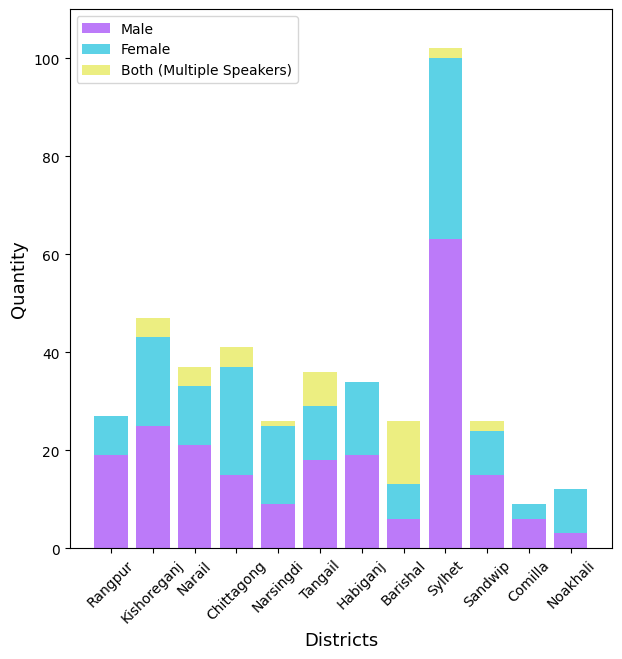

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
x = ['Rangpur', 'Kishoreganj', 'Narail', 'Chittagong', 'Narsingdi', 'Tangail', 'Habiganj', 'Barishal', 'Sylhet', 'Sandwip', 'Comilla', 'Noakhali']
male =   [19,25,21, 15, 9, 18, 19, 6, 63, 15, 6, 3]
female = [8, 18, 12, 22, 16, 11, 15, 7, 37,9, 3, 9]
both =   [0, 4, 4, 4, 1, 7, 0, 13, 2, 2, 0, 0]

bottom_both = list(np.add(male, female))

fig = plt.figure(figsize=(7, 7))

# plot bars in stack manner
plt.bar(x, male, color='#BC7AF9')
plt.bar(x, female, bottom=male, color='#5CD2E6')
plt.bar(x, both, bottom=bottom_both, color='#ECEE81')


plt.ylim(0, 110)
plt.xlabel("Districts", size = 13)
plt.xticks(rotation=45)
plt.ylabel("Quantity", size = 13)
plt.legend(["Male", "Female", "Both (Multiple Speakers)"])

plt.show()

# Unique Topics

In [ ]:
dists = ['Rangpur', 'Kishoreganj', 'Narail', 'Chittagong', 'Narsingdi', 'Tangail','Habiganj','Barishal','Sylhet','Sandwip','Cumilla','Noakhali','Lakshmipur','Nilphamari','Jhenaidah']
x = '''Total = 27 | Unique = 11,Total = 46 | Unique = 20,Total = 28 | Unique = 37,Total = 41 | Unique =30,Total = 26 | Unique = 19,Total = 38 | Unique = 30,Total = 34 | Unique = 16,Total = 24 | Unique = 15,Total = 77 | Unique = 33,Total = 26 | Unique = 16,Total = 9 | Unique = 8,Total = 12 | Unique = 11,Total = 1 | Unique = 1,Total = 3 | Unique = 3,Total = 4 | Unique = 4'''

y = x.split(",")

for i,j in zip(dists,y):
    print(i)
    print(j)


    print("===================")

# Frequency log scale VS Audio length (Seconds)

In [ ]:
#Extract the audio lengths and append to a dataframe
def get_duration(x):
    return librosa.get_duration(path=x)


length_df = df.copy()
length_df["audio_length"] = length_df.file_path.progress_apply(get_duration)
length_df.head()

In [ ]:
# histogram of audio length distribution
length_df['audio_length'].plot(kind='hist', bins=80 ,edgecolor='white')
plt.xlabel('Audio Length (seconds)',fontsize=20)
plt.ylabel('Frequency (Log Scale)',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.yscale('log')
plt.savefig('/kaggle/working/Train audio_length dist.png',bbox_inches='tight',dpi=100)
plt.show()

# Frequency log scale VS Transcription length (Characters)

In [ ]:
df = pd.merge(length_df["file_name"], df, on="file_name", how="left")

transcript_lengths = []
for idx, row in df.iterrows():
    transcript = row['transcripts']
    length = len(transcript)
    
    transcript_lengths.append(length)
    

length_df['transcript_length'] = transcript_lengths
length_df.head()

In [ ]:
# histogram of transcript length distribution
length_df['transcript_length'].plot(kind='hist', bins=100 ,edgecolor='white')
plt.xlabel('Transcription Length (characters)',fontsize=20)
plt.ylabel('Frequency(Log Scale)',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.yscale('log')
plt.savefig('/kaggle/working/Train transcript_length dist.png',bbox_inches='tight',dpi=100)

# Transcription length Vs Audio length

In [ ]:
# Create a scatter plot
sns.scatterplot(x='audio_length', y='transcript_length', data=length_df)

# plt.title('Scatter Plot of Audio Length vs. Transcription Length')
plt.xlabel('Audio Length (seconds)',fontsize=20)
plt.ylabel('Transcription Length (characters)',fontsize=17)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('/kaggle/working/Train audio_transcript_length corr.png',bbox_inches='tight',dpi=100)
plt.show()